In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train_users_2.csv')

# Data Investigation

In [3]:
df_train.shape

(213451, 16)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [5]:
df_train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [6]:
#checking for duplicates
df_train.duplicated().sum()

0

In [7]:
df_train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

# Data Cleaning

In [8]:
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'])
df_train.rename(columns = {'timestamp_first_active':'date_first_active'}, inplace = True)

In [9]:
df_train = df_train.drop(['id'], axis = 1)
df_train.head()

,date_account_created,date_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
#filling age null with zeros instead of null 
df_train['age'].fillna(0, inplace =True)

In [11]:
#removing the age outliers
df_train['zscore'] = (df_train.age - df_train.age.mean()) / df_train.age.std()
df_train = df_train[(df_train.zscore>-3) & (df_train.zscore<3)]

In [12]:
df_train.head()

,date_account_created,date_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,zscore
0,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,0.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,-0.239642
1,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,0.072287
2,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,0.220044
3,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,0.105122
4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,0.096914


# Data Visualization

<AxesSubplot:title={'center':'Ages frequency without the null vaules'}, ylabel='Frequency'>

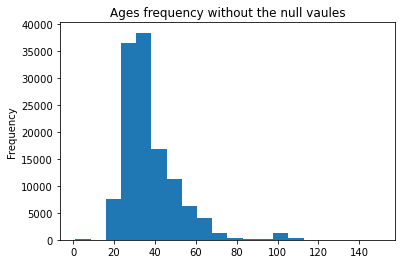

In [13]:
df_train[df_train.age!=0]['age'].plot(kind = 'hist', bins=20, title = 'Ages frequency without the null vaules')

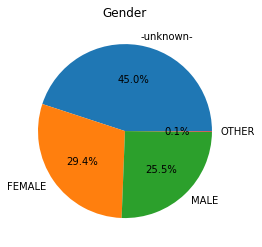

In [14]:
df_train['gender'].value_counts().plot(kind ='pie',title ='Gender',ylabel = '',autopct='%1.1f%%');

<AxesSubplot:title={'center':'country avg. age'}, xlabel='country_destination'>

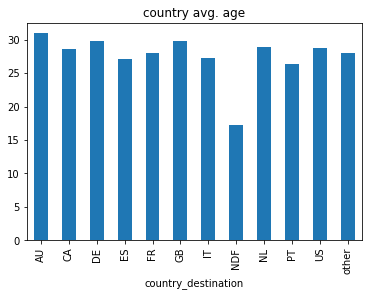

In [15]:
df_train.groupby('country_destination')['age'].mean().plot(kind = 'bar',title='country avg. age')

In [16]:
sns.set_style('whitegrid')
sns.set_context("talk")

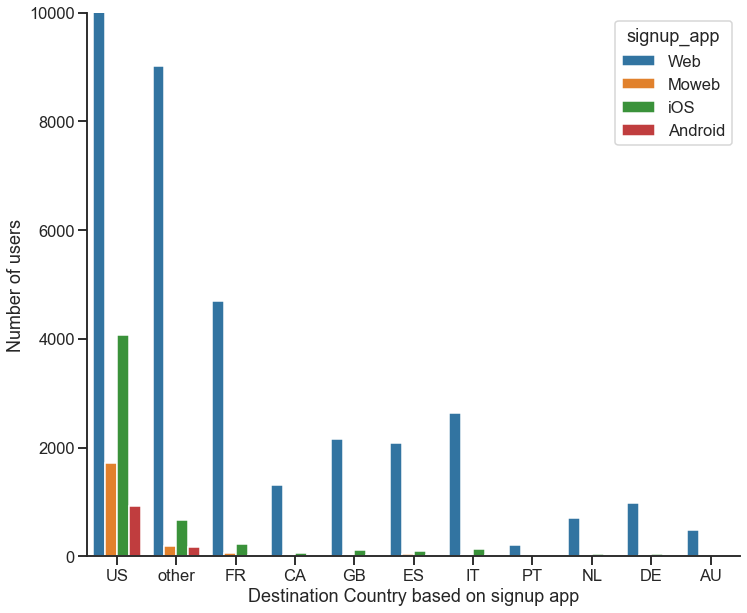

In [17]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
plt.ylim(0,10000)
df_train_NDF=df_train[df_train['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=df_train_NDF)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

#Insights:
#most users signup using web

Text(0.5, 0, 'Date account created line plot ')

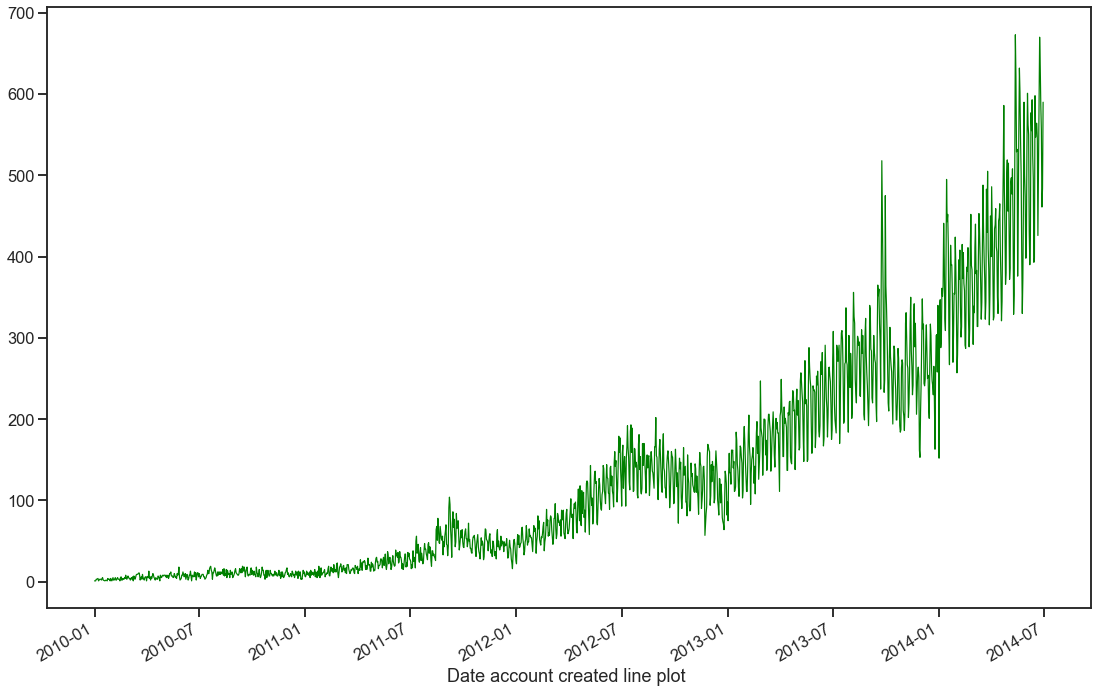

In [18]:
df_train['date_account_created_new'] = pd.to_datetime(df_train['date_account_created'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
df_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2, color='green')
plt.xlabel('Date account created line plot ')

#Insights:
#There is a spike of users between September and October 

Text(0.5, 1.0, 'Date of first booking line plot ')

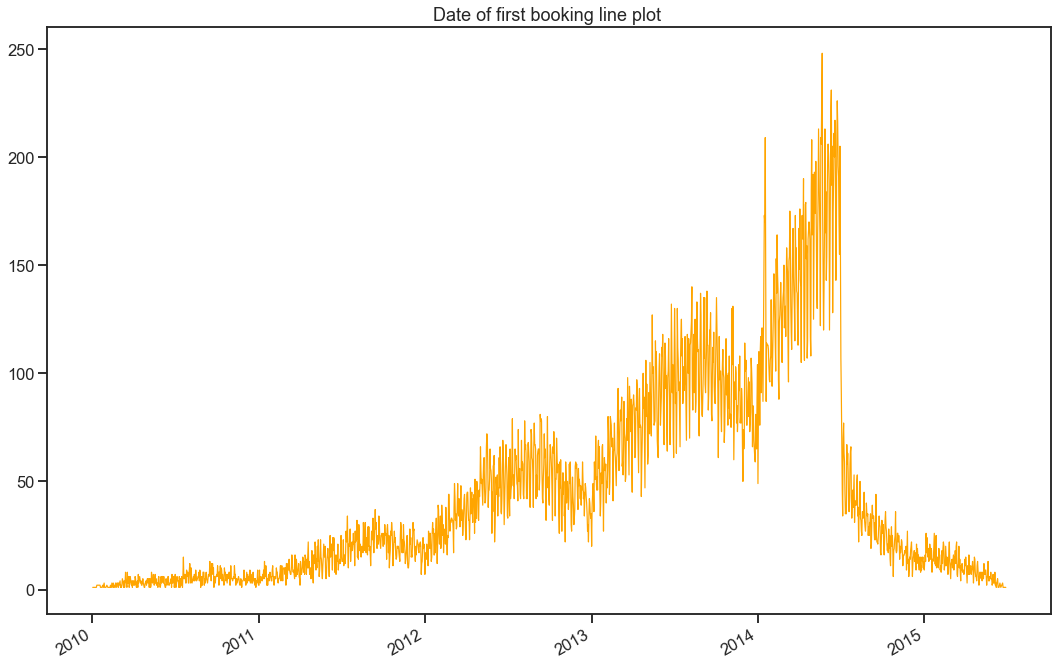

In [19]:
df_train['date_first_booking_new'] = pd.to_datetime(df_train['date_first_booking'])
df_train.date_first_booking_new.notnull()
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 12)
df_train.date_first_booking_new.value_counts().plot(kind='line', linewidth=1.2, color='orange')
plt.title('Date of first booking line plot ')